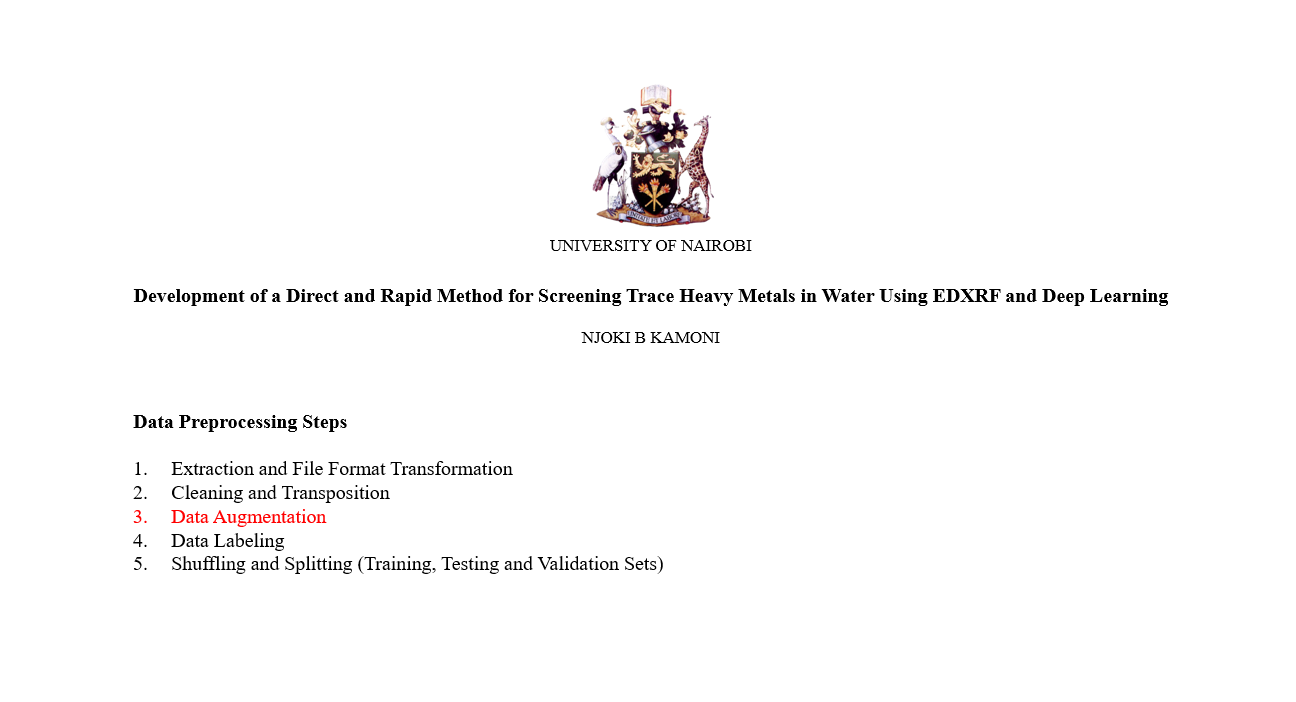

#Data Augmentation Through the Hilbert Transform

##Introduction

Deep Learning models require large data sets for training, testing and validation. The demand for data is not met in a laboratory or field setting with limited time. This challenge can be solved through data augmentation which is the process of artificially increasing the size of a dataset by generating new data samples from existing ones. This is useful for improving the performance of the deep learning models, particularly when the original dataset is small.

This study utilized the application of the Hilbert transform in the augmentation of EDXRF spectral data obtained from water sample simulates prepared at a laboratory.

The Hilbert transform of a function f(t) is defined as the convolution of f(t) with the function h(t) = (1/π) * (t / (t^2 + 1)) which achieves the convertion of a real-valued function into a complex-valued function, known as the analytic representation of the original function. The real part of the analytic representation is the original function, and the imaginary part is the Hilbert transform of the original function.

H[f(t)] = (1/π) * ∫[-∞,∞] (t / (t^2 + 1)) * f(t) dt

##Setting up the working directory

The original and augmented data were saved and accessed from Google Drive.

In [ ]:
# mounting Google Drive to Colab
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# setting directory in Google Drive
%cd gdrive/MyDrive

/content/gdrive/MyDrive


##Importing the required libraries

scipy.signal a Python library that provides tools for signals processing was utilized in this study where it implemented the Hilbert transform as a hilbert function

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import hilbert, resample
import csv

##Loading the original data

The original data comprised of EDXRF spectral data obtained from sample simulates in four categories of reducing concentrations (Series A, B, C and D). Data from each category was loaded separately. 

The data was cleaned and transposed so that rows represented samples and columns the energies in a comma separated values (csv) file .The file was named 'original_edxrf_data' and uploaded in google drive.

Pandas was used in reading the csv file into a data frame

In [ ]:
# Reading the CSV file into a pandas data frame
df = pd.read_csv('original_edxrf_data.csv')
edxrf_data=df

##Performing data augmentation

Data augmentation was performed on the whole spectrum by applying the Hilbert transform on 'original_edxrf_data'. The number of generate samples was also set in batches of 500. For accurate mapping, the value is not set too high.

In [ ]:
# Appying the Hilbert transformation
hilbert_transformed_data = hilbert(edxrf_data)

# Setting the number of new samples
resampled_data = resample(edxrf_data, 500)

# Merging the edxrf data with the augmented data 
edxrf_augmented_data = np.concatenate((edxrf_data, hilbert_transformed_data, resampled_data))


##Saving a csv file with the new samples

The new dataset was saved as 'edxrf_augmented_data' into the working directory.

In [ ]:
# Convert the augmented data to a list of lists, where each inner list contains only integers
edxrf_augmented_data_int = [[int(val) for val in row] for row in edxrf_augmented_data]

# Open a file for writing
with open('edxrf_augmented_data.csv', 'w', newline='') as csvfile:
  # Create a CSV writer object
  writer = csv.writer(csvfile)

  # Write the augmented data to the CSV file
  writer.writerows(edxrf_augmented_data_int)

<ipython-input-6-bddc42ce31e5>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  edxrf_augmented_data_int = [[int(val) for val in row] for row in edxrf_augmented_data]


These steps were repeated for all individual concentration categories

Follow this link to read the notebook on sample shuffling and splitting https://colab.research.google.com/drive/1u1nKZQNL2xAeSd9NyRfQGEcee4MamG9m?usp=sharing

Follow this link to read the notebook on the deep learning model built for this data https://colab.research.google.com/drive/1vDko6SYts3HJ7Cr7L_g9OMlIe1Ppb1TG?usp=sharing